In [2]:
#import packages
import pandas as pd
import numpy as np
import requests
import tweepy
import os
import json
import time
import re
import matplotlib.pyplot as plt
%matplotlib inline

### Gather

In [3]:
#read csv fail(twitter archive) as a Pandas DataFrame
df_archive = pd.read_csv('twitter-archive-enhanced.csv')
df_archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [4]:
url = "https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv"
response = requests.get(url)

with open('image-predictions.tsv', mode ='wb') as file:
    file.write(response.content)


In [5]:
#Read TSV file
image_prediction = pd.read_csv('image-predictions.tsv', sep='\t' )

In [6]:
image_prediction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [ ]:
# Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
consumer_key = 'HIDDEN'
consumer_secret = 'HIDDEN'
access_token = 'HIDDEN'
access_secret = 'HIDDEN'

In [ ]:
auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)
api = tweepy.API(auth, wait_on_rate_limit=True)

In [ ]:
tweet_ids = df_archive.tweet_id.values
len(tweet_ids)

In [ ]:
count = 0
fails_dict = {}
start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet-json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepError as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)

In [7]:
# my code to reading the api_df
df_list = []

with open('tweet-json.txt', 'r') as file:
    for line in file:
        tweet = json.loads(line)
        tweet_id = tweet['id']
        retweet_count = tweet['retweet_count']
        fav_count = tweet['favorite_count']
        user_count = tweet['user']['followers_count']
        created_at = tweet['created_at']
        df_list.append({'tweet_id':tweet_id,
                       'retweet_count': retweet_count,
                       'favorite_count': fav_count,
                       'user_count': user_count,
                       'created_at': created_at})
        
tweet_df = pd.DataFrame(df_list)
tweet_df.head()

,created_at,favorite_count,retweet_count,tweet_id,user_count
0,Tue Aug 01 16:23:56 +0000 2017,39467,8853,892420643555336193,3200889
1,Tue Aug 01 00:17:27 +0000 2017,33819,6514,892177421306343426,3200889
2,Mon Jul 31 00:18:03 +0000 2017,25461,4328,891815181378084864,3200889
3,Sun Jul 30 15:58:51 +0000 2017,42908,8964,891689557279858688,3200889
4,Sat Jul 29 16:00:24 +0000 2017,41048,9774,891327558926688256,3200889


In [8]:
tweet_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 5 columns):
created_at        2354 non-null object
favorite_count    2354 non-null int64
retweet_count     2354 non-null int64
tweet_id          2354 non-null int64
user_count        2354 non-null int64
dtypes: int64(4), object(1)
memory usage: 92.0+ KB


### Assessing data

In [9]:
df_archive

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


In [10]:
image_prediction

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


In [11]:
tweet_df

,created_at,favorite_count,retweet_count,tweet_id,user_count
0,Tue Aug 01 16:23:56 +0000 2017,39467,8853,892420643555336193,3200889
1,Tue Aug 01 00:17:27 +0000 2017,33819,6514,892177421306343426,3200889
2,Mon Jul 31 00:18:03 +0000 2017,25461,4328,891815181378084864,3200889
3,Sun Jul 30 15:58:51 +0000 2017,42908,8964,891689557279858688,3200889
4,Sat Jul 29 16:00:24 +0000 2017,41048,9774,891327558926688256,3200889
5,Sat Jul 29 00:08:17 +0000 2017,20562,3261,891087950875897856,3200889
6,Fri Jul 28 16:27:12 +0000 2017,12041,2158,890971913173991426,3200889
7,Fri Jul 28 00:22:40 +0000 2017,56848,16716,890729181411237888,3200889
8,Thu Jul 27 16:25:51 +0000 2017,28226,4429,890609185150312448,3200889
9,Wed Jul 26 15:59:51 +0000 2017,32467,7711,890240255349198849,3200889


In [12]:
df_archive.sample(10)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2162,669393256313184256,NaN,NaN,2015-11-25 05:52:43 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Ronduh. She's a Finnish Checkered Blitzkr...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/669393256...,10,10,Ronduh,None,None,None,None
1307,707315916783140866,NaN,NaN,2016-03-08 21:23:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Finnegus. He's trapped in a snow globe...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/707315916...,10,10,Finnegus,None,None,pupper,None
1659,683098815881154561,NaN,NaN,2016-01-02 01:33:43 +0000,"<a href=""http://twitter.com/download/iphone"" r...",aahhhhkslaldhwnxmzbbs 12/10 for being da smoos...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/683098815...,12,10,None,None,None,None,None
565,802265048156610565,7.331095e+17,4.196984e+09,2016-11-25 21:37:47 +0000,"<a href=""http://twitter.com/download/iphone"" r...","Like doggo, like pupper version 2. Both 11/10 ...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/802265048...,11,10,None,doggo,None,pupper,None
1470,694001791655137281,NaN,NaN,2016-02-01 03:38:15 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Chester. He's a Benefloof Cumberbark. ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/694001791...,11,10,Chester,None,None,None,None
137,866094527597207552,NaN,NaN,2017-05-21 00:53:21 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Here's a pupper before and afte...,8.378202e+17,4.196984e+09,2017-03-04 00:21:08 +0000,https://twitter.com/dog_rates/status/837820167...,12,10,None,None,None,pupper,None
699,786286427768250368,NaN,NaN,2016-10-12 19:24:27 +0000,"<a href=""http://vine.co"" rel=""nofollow"">Vine -...",This is Arnie. He's afraid of his own bark. 12...,NaN,NaN,NaN,https://vine.co/v/5XH0WqHwiFp,12,10,Arnie,None,None,None,None
1951,673686845050527744,NaN,NaN,2015-12-07 02:13:55 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is George. He's upset that the 4th of Jul...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/673686845...,11,10,George,None,None,None,None
536,807010152071229440,NaN,NaN,2016-12-08 23:53:08 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Lennon. He's a Boopershnoop Pupperdoop...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/807010152...,12,10,Lennon,None,None,None,None
1277,709042156699303936,NaN,NaN,2016-03-13 15:43:18 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Klevin. He's addicted to sandwiches (y...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/709042156...,9,10,Klevin,None,None,None,None


In [13]:
df_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [14]:
df_archive[df_archive['expanded_urls'].isnull()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
30,886267009285017600,8.862664e+17,2.281182e+09,2017-07-15 16:51:35 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@NonWhiteHat @MayhewMayhem omg hello tanner yo...,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None
55,881633300179243008,8.816070e+17,4.738443e+07,2017-07-02 21:58:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@roushfenway These are good dogs but 17/10 is ...,NaN,NaN,NaN,NaN,17,10,None,None,None,None,None
64,879674319642796034,8.795538e+17,3.105441e+09,2017-06-27 12:14:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@RealKentMurphy 14/10 confirmed,NaN,NaN,NaN,NaN,14,10,None,None,None,None,None
113,870726314365509632,8.707262e+17,1.648776e+07,2017-06-02 19:38:25 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@ComplicitOwl @ShopWeRateDogs &gt;10/10 is res...,NaN,NaN,NaN,NaN,10,10,None,None,None,None,None
148,863427515083354112,8.634256e+17,7.759620e+07,2017-05-13 16:15:35 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@Jack_Septic_Eye I'd need a few more pics to p...,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None
179,857214891891077121,8.571567e+17,1.806710e+08,2017-04-26 12:48:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@Marc_IRL pixelated af 12/10,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None
185,856330835276025856,NaN,NaN,2017-04-24 02:15:55 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @Jenna_Marbles: @dog_rates Thanks for ratin...,8.563302e+17,66699013.0,2017-04-24 02:13:14 +0000,NaN,14,10,None,None,None,None,None
186,856288084350160898,8.562860e+17,2.792810e+08,2017-04-23 23:26:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@xianmcguire @Jenna_Marbles Kardashians wouldn...,NaN,NaN,NaN,NaN,14,10,None,None,None,None,None
188,855862651834028034,8.558616e+17,1.943518e+08,2017-04-22 19:15:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@dhmontgomery We also gave snoop dogg a 420/10...,NaN,NaN,NaN,NaN,420,10,None,None,None,None,None
189,855860136149123072,8.558585e+17,1.361572e+07,2017-04-22 19:05:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@s8n You tried very hard to portray this good ...,NaN,NaN,NaN,NaN,666,10,None,None,None,None,None


In [15]:
df_archive.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [16]:
df_archive.name.value_counts()

None          745
a              55
Charlie        12
Cooper         11
Oliver         11
Lucy           11
Penny          10
Tucker         10
Lola           10
Winston         9
Bo              9
the             8
Sadie           8
Bailey          7
Buddy           7
Daisy           7
an              7
Toby            7
Oscar           6
Stanley         6
Milo            6
Dave            6
Jack            6
Koda            6
Leo             6
Jax             6
Scout           6
Bella           6
Rusty           6
George          5
             ... 
Ambrose         1
Bruno           1
Jazzy           1
Stormy          1
Snicku          1
Mark            1
Charleson       1
Stark           1
Skye            1
Derby           1
Harvey          1
Kaiya           1
Pupcasso        1
Timofy          1
Rey             1
Rilo            1
Pubert          1
Roscoe          1
Ralphé          1
Tess            1
Furzey          1
such            1
officially      1
Shawwn          1
Akumi     

In [17]:
# weird names
df_archive[df_archive['name'].apply(len) < 3]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
56,881536004380872706,NaN,NaN,2017-07-02 15:32:16 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a pupper approaching maximum borkdrive...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/881536004...,14,10,a,None,None,pupper,None
393,825876512159186944,NaN,NaN,2017-01-30 01:21:19 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Mo. No one will push him around in the...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/825876512...,11,10,Mo,None,None,None,None
446,819015337530290176,NaN,NaN,2017-01-11 02:57:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Bo. He was a very good ...,8.190048e+17,4.196984e+09,2017-01-11 02:15:36 +0000,https://twitter.com/dog_rates/status/819004803...,14,10,Bo,doggo,None,None,None
449,819004803107983360,NaN,NaN,2017-01-11 02:15:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bo. He was a very good First Doggo. 14...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/819004803...,14,10,Bo,doggo,None,None,None
553,804026241225523202,NaN,NaN,2016-11-30 18:16:08 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bo. He's going to make me cry. 13/10 p...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/804026241...,13,10,Bo,None,None,None,None
583,800188575492947969,NaN,NaN,2016-11-20 04:06:37 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Bo. He's a Benedoop Cum...,6.816941e+17,4.196984e+09,2015-12-29 04:31:49 +0000,https://twitter.com/dog_rates/status/681694085...,11,10,Bo,None,None,pupper,None
649,792913359805018113,NaN,NaN,2016-10-31 02:17:31 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a perfect example of someone who has t...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/792913359...,13,10,a,None,None,None,None
679,789137962068021249,NaN,NaN,2016-10-20 16:15:26 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bo. He's a West Congolese Bugaboop Snu...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/789137962...,12,10,Bo,None,None,None,None
686,788070120937619456,NaN,NaN,2016-10-17 17:32:13 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Bo and Ty. Bo eats pape...,7.610045e+17,4.196984e+09,2016-08-04 01:03:17 +0000,https://twitter.com/dog_rates/status/761004547...,11,10,Bo,None,None,None,None
759,778396591732486144,NaN,NaN,2016-09-21 00:53:04 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is an East African Chalupa...,7.030419e+17,4.196984e+09,2016-02-26 02:20:37 +0000,https://twitter.com/dog_rates/status/703041949...,10,10,an,None,None,None,None


In [18]:
# invalid values in rating
df_archive['rating_denominator'].value_counts() 
df_archive['rating_numerator'].value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
420       2
0         2
15        2
75        2
80        1
20        1
24        1
26        1
44        1
50        1
60        1
165       1
84        1
88        1
144       1
182       1
143       1
666       1
960       1
1776      1
17        1
27        1
45        1
99        1
121       1
204       1
Name: rating_numerator, dtype: int64

In [19]:
df_archive['rating_numerator'][df_archive['rating_numerator']< 10]

45      5
229     6
315     0
387     7
462     7
485     9
599     8
605     1
730     5
745     8
764     8
765     3
784     9
814     7
835     8
845     9
859     8
860     8
883     4
896     7
906     9
912     4
915     8
936     8
946     9
948     8
956     5
964     8
966     9
987     8
       ..
2312    5
2314    8
2315    8
2316    4
2317    9
2319    9
2320    7
2322    6
2323    7
2326    2
2327    7
2328    9
2330    6
2331    8
2333    9
2334    3
2335    1
2338    1
2340    8
2341    9
2342    6
2344    9
2346    8
2347    9
2349    2
2351    5
2352    6
2353    9
2354    7
2355    8
Name: rating_numerator, Length: 440, dtype: int64

In [20]:
# ratings that is under 10
sum(df_archive['rating_numerator']< 10)

440

In [21]:
df_archive['rating_denominator'][df_archive['rating_denominator']!= 10]

313       0
342      15
433      70
516       7
784      11
902     150
1068     11
1120    170
1165     20
1202     50
1228     90
1254     80
1274     50
1351     50
1433     40
1598     20
1634    130
1635    110
1662     11
1663     16
1779    120
1843     80
2335      2
Name: rating_denominator, dtype: int64

In [22]:
# ratings that not based to 10
sum(df_archive['rating_denominator']!= 10)

23

In [23]:
df_archive[['rating_numerator','rating_denominator']][df_archive['rating_denominator']!= 10]

,rating_numerator,rating_denominator
313,960,0
342,11,15
433,84,70
516,24,7
784,9,11
902,165,150
1068,9,11
1120,204,170
1165,4,20
1202,50,50


In [24]:
#Assessing duplicated 
duplicated_col = pd.Series(list(df_archive) + 
                               list(image_prediction) + list(tweet_df))
duplicated_col[duplicated_col.duplicated()]

17    tweet_id
32    tweet_id
dtype: object

In [25]:
# The orignal
df_archive[df_archive['retweeted_status_id'].isnull()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


In [26]:
image_prediction.sample(10)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
932,703268521220972544,https://pbs.twimg.com/media/CcKC-5LW4AAK-nb.jpg,1,wool,0.525434,False,fur_coat,0.236391,False,kuvasz,0.038243,True
962,705970349788291072,https://pbs.twimg.com/media/CcwcSS9WwAALE4f.jpg,1,golden_retriever,0.776346,True,Labrador_retriever,0.112413,True,chow,0.036953,True
1327,757393109802180609,https://pbs.twimg.com/media/CoLNAq6WAAAkmdJ.jpg,2,Labrador_retriever,0.787125,True,Chesapeake_Bay_retriever,0.112676,True,Rottweiler,0.048039,True
115,667937095915278337,https://pbs.twimg.com/media/CUT9PuQWwAABQv7.jpg,1,hamster,0.172078,False,guinea_pig,0.094924,False,Band_Aid,0.059995,False
297,671390180817915904,https://pbs.twimg.com/media/CVFBzpXVEAAHIOv.jpg,1,zebra,0.997673,False,tiger,0.000837,False,prairie_chicken,0.000575,False
702,684902183876321280,https://pbs.twimg.com/media/CYFC5lmWAAAEIho.jpg,1,Pembroke,0.708034,True,Cardigan,0.291447,True,dingo,0.000185,False
638,681281657291280384,https://pbs.twimg.com/media/CXRmDfWWMAADCdc.jpg,1,Saint_Bernard,0.998830,True,Pekinese,0.000391,True,Great_Pyrenees,0.000224,True
677,683481228088049664,https://pbs.twimg.com/media/CXw2jSpWMAAad6V.jpg,1,keeshond,0.508951,True,chow,0.442016,True,German_shepherd,0.013206,True
18,666268910803644416,https://pbs.twimg.com/media/CT8QCd1WEAADXws.jpg,1,desktop_computer,0.086502,False,desk,0.085547,False,bookcase,0.079480,False
1850,840268004936019968,https://pbs.twimg.com/media/C6k7SaEXUAg83_J.jpg,3,Chesapeake_Bay_retriever,0.863987,True,Labrador_retriever,0.052632,True,kelpie,0.032574,True


In [27]:
image_prediction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [28]:
image_prediction.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [29]:
image_prediction.p1.value_counts()
image_prediction.p2.value_counts()
image_prediction.p3.value_counts()

Labrador_retriever                79
Chihuahua                         58
golden_retriever                  48
Eskimo_dog                        38
kelpie                            35
kuvasz                            34
Staffordshire_bullterrier         32
chow                              32
cocker_spaniel                    31
beagle                            31
toy_poodle                        29
Pomeranian                        29
Pekinese                          29
Pembroke                          27
Chesapeake_Bay_retriever          27
Great_Pyrenees                    27
French_bulldog                    26
malamute                          26
American_Staffordshire_terrier    24
Cardigan                          23
pug                               23
basenji                           21
toy_terrier                       20
bull_mastiff                      20
Siberian_husky                    19
Shetland_sheepdog                 17
Boston_bull                       17
L

In [30]:
sum(image_prediction.jpg_url.duplicated())

66

In [31]:
tweet_df.sample(10)

,created_at,favorite_count,retweet_count,tweet_id,user_count
490,Tue Dec 27 17:36:16 +0000 2016,9300,2060,813800681631023104,3200895
1461,Tue Feb 02 23:52:22 +0000 2016,26068,13517,694669722378485760,3200950
1997,Thu Dec 03 21:11:09 +0000 2015,696,189,672523490734551040,3201006
1513,Sat Jan 23 20:07:44 +0000 2016,6513,3282,690989312272396288,3200951
1229,Fri Mar 25 01:35:51 +0000 2016,7854,3183,713177543487135744,3200947
1715,Fri Dec 25 01:00:07 +0000 2015,2356,577,680191257256136705,3200953
2231,Sat Nov 21 23:10:52 +0000 2015,586,206,668204964695683073,3201015
1027,Wed Jun 22 20:18:30 +0000 2016,7652,2636,745712589599014916,3200943
1923,Tue Dec 08 03:09:46 +0000 2015,6769,2450,674063288070742018,3201003
442,Thu Jan 12 00:55:47 +0000 2017,8008,1383,819347104292290561,3200894


In [32]:
tweet_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 5 columns):
created_at        2354 non-null object
favorite_count    2354 non-null int64
retweet_count     2354 non-null int64
tweet_id          2354 non-null int64
user_count        2354 non-null int64
dtypes: int64(4), object(1)
memory usage: 92.0+ KB


In [33]:
tweet_df.describe()

,favorite_count,retweet_count,tweet_id,user_count
count,2354.000000,2354.000000,2.354000e+03,2.354000e+03
mean,8080.968564,3164.797366,7.426978e+17,3.200942e+06
std,11814.771334,5284.770364,6.852812e+16,4.457302e+01
min,0.000000,0.000000,6.660209e+17,3.200799e+06
25%,1415.000000,624.500000,6.783975e+17,3.200898e+06
50%,3603.500000,1473.500000,7.194596e+17,3.200945e+06
75%,10122.250000,3652.000000,7.993058e+17,3.200953e+06
max,132810.000000,79515.000000,8.924206e+17,3.201018e+06


# summary Assessing data
#### Quality:
        1- Null values in  retweeted_status_id.
        2- We want  original ratings that have images only, so we need to Drop columns related to any retweets info & delete unnecessary columns.
        3- incorrect names, need to clean it.
        4- convert "timestamp" datatype  to datetime type.
        5- Delete duplicated in 'jpg_url'
        6- datatype in 'rating_numerator', 'rating_denominator' need change to 'float' 
        7- datatype in 'tweet_id' need change to 'str' type 
        8- Invalid values in numerator and denominator column.
#### tidens:
        1-Merging data frames together.
        2-The columns (doggo, floofer, pupper, puppo)  melt into one column (dog_stages)


### Clean 

In [34]:
# First copy our data
df_archive_clean = df_archive.copy()
image_prediction_clean = image_prediction.copy()
tweet_df_clean = tweet_df.copy()

##### Define
###### Deleting retweets data


In [35]:
#CODE
df_archive_clean = df_archive_clean[pd.isnull(df_archive_clean['retweeted_status_user_id'])]

#TEST
print(sum(df_archive_clean.retweeted_status_user_id.value_counts()))

0


##### Define
###### melt (doggo, floofer, pupper, puppo)

In [36]:
#Code:
#Select columns to melt
melt_columns = ['doggo', 'floofer', 'pupper', 'puppo']
stay_columns = [x for x in df_archive_clean.columns.tolist() if x not in melt_columns]
df_archive_clean = pd.melt(df_archive_clean, id_vars = stay_columns,
                                value_vars = melt_columns, var_name = 'stages',
                                value_name = 'dog_stage')
df_archive_clean = df_archive_clean.drop('stages', 1)


In [37]:
#Test
df_archive_clean.dog_stage.value_counts()

None       8344
pupper      234
doggo        87
puppo        25
floofer      10
Name: dog_stage, dtype: int64

##### Define
###### clean name

In [38]:
#CODE:
name_lower = df_archive_clean.name.str.contains('^[a-z]', regex = True)

df_archive_clean.loc[name_lower, 'name'] = 'None'


In [39]:
#TEST
df_archive_clean['name'].value_counts()

None         3136
Charlie        44
Lucy           44
Oliver         40
Cooper         40
Penny          36
Tucker         36
Sadie          32
Winston        32
Lola           32
Daisy          28
Toby           28
Bo             24
Oscar          24
Koda           24
Stanley        24
Jax            24
Bailey         24
Bella          24
Chester        20
Leo            20
Dave           20
Louis          20
Scout          20
Buddy          20
Rusty          20
Bentley        20
Milo           20
Oakley         16
Larry          16
             ... 
Maks            4
Blakely         4
Dewey           4
Cali            4
Rilo            4
Pupcasso        4
Andru           4
Kaiya           4
Brandy          4
Chevy           4
Aubie           4
Steve           4
Jo              4
Jaspers         4
Brady           4
Barry           4
Kramer          4
Geoff           4
Bilbo           4
Jebberson       4
Severus         4
Grizzwald       4
Sailer          4
Sojourner       4
Gin       

##### Define
###### convert timestamp datatype to datetime

In [40]:
#CODE:
df_archive_clean['timestamp'] = pd.to_datetime(df_archive_clean['timestamp'])

In [41]:
# TEST
df_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8700 entries, 0 to 8699
Data columns (total 14 columns):
tweet_id                      8700 non-null int64
in_reply_to_status_id         312 non-null float64
in_reply_to_user_id           312 non-null float64
timestamp                     8700 non-null datetime64[ns]
source                        8700 non-null object
text                          8700 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 8468 non-null object
rating_numerator              8700 non-null int64
rating_denominator            8700 non-null int64
name                          8700 non-null object
dog_stage                     8700 non-null object
dtypes: datetime64[ns](1), float64(4), int64(3), object(6)
memory usage: 951.6+ KB


##### Define 
###### drop what we don't need

In [42]:
#code:
df_archive_clean.drop(['source',
                       'in_reply_to_status_id',
                       'in_reply_to_user_id',
                       'retweeted_status_id',
                       'retweeted_status_user_id',
                       'retweeted_status_timestamp',
                       'expanded_urls',
                       'retweeted_status_id'], 1, inplace=True)
df_archive_clean = df_archive_clean.reset_index()


In [43]:
# test
df_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8700 entries, 0 to 8699
Data columns (total 8 columns):
index                 8700 non-null int64
tweet_id              8700 non-null int64
timestamp             8700 non-null datetime64[ns]
text                  8700 non-null object
rating_numerator      8700 non-null int64
rating_denominator    8700 non-null int64
name                  8700 non-null object
dog_stage             8700 non-null object
dtypes: datetime64[ns](1), int64(4), object(3)
memory usage: 543.8+ KB


In [44]:
df_archive_clean = df_archive_clean.sort_values('dog_stage').drop_duplicates('tweet_id', keep = 'last')
df_archive_clean = df_archive_clean.drop_duplicates()

In [45]:
df_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 2095 to 7298
Data columns (total 8 columns):
index                 2175 non-null int64
tweet_id              2175 non-null int64
timestamp             2175 non-null datetime64[ns]
text                  2175 non-null object
rating_numerator      2175 non-null int64
rating_denominator    2175 non-null int64
name                  2175 non-null object
dog_stage             2175 non-null object
dtypes: datetime64[ns](1), int64(4), object(3)
memory usage: 152.9+ KB


##### Define
###### convert rating datatype to float

In [46]:
# code :
df_archive_clean['rating_numerator'] = df_archive_clean['rating_numerator'].astype('float')

df_archive_clean['rating_denominator'] = df_archive_clean['rating_denominator'].astype('float')


##### Define
###### convert "tweet_id, dog_stage" datatype datatype

In [47]:
#code
df_archive_clean['tweet_id']=df_archive_clean['tweet_id'].astype(str)
df_archive_clean['dog_stage'] = df_archive_clean['dog_stage'].astype('category')

In [48]:
# test for last 4 convert
df_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 2095 to 7298
Data columns (total 8 columns):
index                 2175 non-null int64
tweet_id              2175 non-null object
timestamp             2175 non-null datetime64[ns]
text                  2175 non-null object
rating_numerator      2175 non-null float64
rating_denominator    2175 non-null float64
name                  2175 non-null object
dog_stage             2175 non-null category
dtypes: category(1), datetime64[ns](1), float64(2), int64(1), object(3)
memory usage: 138.3+ KB


##### Define
###### convert "tweet_id" datatype 

In [49]:
image_prediction_clean['tweet_id']= image_prediction_clean['tweet_id'].astype(str)
tweet_df_clean['tweet_id']= tweet_df_clean['tweet_id'].astype(str)

In [50]:
image_prediction_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null object
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(1), object(5)
memory usage: 152.1+ KB


In [51]:
tweet_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 5 columns):
created_at        2354 non-null object
favorite_count    2354 non-null int64
retweet_count     2354 non-null int64
tweet_id          2354 non-null object
user_count        2354 non-null int64
dtypes: int64(3), object(2)
memory usage: 92.0+ KB


##### Define
###### drop duplicate

In [52]:
image_prediction_clean = image_prediction_clean.drop_duplicates(subset=['jpg_url'], keep='first')

In [53]:
sum(image_prediction_clean['jpg_url'].duplicated())

0

##### Define
###### merge three dataframes

In [ ]:
# code:
new_df = pd.merge(left=df_archive_clean,
                                 right=tweet_df_clean,
                                 left_on='tweet_id',
                                 right_on='tweet_id',
                                 how='inner')
twitter_data_clean = new_df.merge(image_prediction_clean,
                                                    on='tweet_id',
                                                    how='inner')

In [ ]:
# test:
twitter_data_clean.info()

##### Define
        cleaning reting value

###### Code

In [ ]:
invalid_denominator=list(twitter_data_clean['tweet_id'][twitter_data_clean['rating_denominator'] !=10])

In [ ]:
for i in invalid_denominator:
    x= twitter_data_clean[i == twitter_data_clean['tweet_id']][['tweet_id','jpg_url']]
    print(x)

In [ ]:
invalid_denominator

In [ ]:
pd.set_option('display.max_colwidth', -1)

In [ ]:
twitter_data_clean[['tweet_id','rating_denominator','rating_numerator']][twitter_data_clean['rating_denominator']!= 10]


In [ ]:
text_rating_fix = twitter_data_clean[twitter_data_clean.text.str.contains( r"(\d+\.?\d*\/\d+\.?\d*\D+\d+\.?\d*\/\d+\.?\d*)")].text

text_rating_fix

In [ ]:
for entry in text_rating_fix:
    mask = twitter_data_clean.text == entry
    col_name1 = 'rating_numerator'
    col_name2 = 'rating_denominator'
    twitter_data_clean.loc[mask, col_name1] = re.findall(r"\d+\.?\d*\/\d+\.?\d*\D+(\d+\.?\d*)\/\d+\.?\d*", entry)
    twitter_data_clean.loc[mask, col_name2] = 10

In [ ]:
twitter_data_clean[twitter_data_clean.text.isin(text_rating_fix)]

In [ ]:
twitter_data_clean[twitter_data_clean.text.str.contains(r"(\d+\.\d*\/\d+)")]

In [ ]:
# Set correct numerators 
twitter_data_clean.loc[(twitter_data_clean['tweet_id'] == 883482846933004288) & (twitter_data_clean['rating_numerator'] == 5), ['rating_numerator']] = 13.5
twitter_data_clean.loc[(twitter_data_clean['tweet_id'] == 786709082849828864) & (twitter_data_clean['rating_numerator'] == 75), ['rating_numerator']] = 9.75
twitter_data_clean.loc[(twitter_data_clean['tweet_id'] == 778027034220126208) & (twitter_data_clean['rating_numerator'] == 27), ['rating_numerator']] = 11.27
twitter_data_clean.loc[(twitter_data_clean['tweet_id'] == 680494726643068929) & (twitter_data_clean['rating_numerator'] == 26), ['rating_numerator']] = 11.26

In [ ]:
twitter_data_clean[twitter_data_clean.text.str.contains(r"(\d+\.\d*\/\d+)")]


In [ ]:
twitter_data_clean.loc[(twitter_data_clean.tweet_id == 740373189193256964), 'rating_numerator'] = 14
twitter_data_clean.loc[(twitter_data_clean.tweet_id == 740373189193256964), 'rating_denominator'] = 10

twitter_data_clean.loc[(twitter_data_clean.tweet_id == 682962037429899265), 'rating_numerator'] = 10
twitter_data_clean.loc[(twitter_data_clean.tweet_id == 682962037429899265), 'rating_denominator'] = 10

twitter_data_clean.loc[(twitter_data_clean.tweet_id == 666287406224695296), 'rating_numerator'] = 9
twitter_data_clean.loc[(twitter_data_clean.tweet_id == 666287406224695296), 'rating_denominator'] = 10

twitter_data_clean.loc[(twitter_data_clean.tweet_id == 722974582966214656), 'rating_numerator'] = 13
twitter_data_clean.loc[(twitter_data_clean.tweet_id == 722974582966214656), 'rating_denominator'] = 10

twitter_data_clean.loc[(twitter_data_clean.tweet_id == 716439118184652801), 'rating_numerator'] = 13.5
twitter_data_clean.loc[(twitter_data_clean.tweet_id == 716439118184652801), 'rating_denominator'] = 10

#CODE: Delete  tweets with no  ratings
twitter_data_clean = twitter_data_clean[twitter_data_clean['tweet_id'] != 832088576586297345]
twitter_data_clean = twitter_data_clean[twitter_data_clean['tweet_id'] != 810984652412424192]
twitter_data_clean = twitter_data_clean[twitter_data_clean['tweet_id'] != 682808988178739200]
twitter_data_clean = twitter_data_clean[twitter_data_clean['tweet_id'] != 835246439529840640]
twitter_data_clean = twitter_data_clean[twitter_data_clean['tweet_id'] != 686035780142297088]

In [ ]:
with pd.option_context('max_colwidth', 200):
    display(twitter_data_clean[twitter_data_clean['rating_denominator'] != 10][['tweet_id',
                                                                                      'text',
                                                                                      'rating_numerator',
                                                                                      'rating_denominator']])

### store Data 

In [70]:
twitter_data_clean.to_csv('twitter_archive_master.csv', index= False, encoding='utf-8')

In [71]:
df_master = pd.read_csv('twitter_archive_master.csv')
df_master.head()

,index,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,dog_stage,created_at,favorite_count,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,2095,667443425659232256,2015-11-19 20:44:47,Exotic dog here. Long neck. Weird paws. Obsessed with bread. Waddles. Flies sometimes (wow!). Very happy dog. 6/10 https://t.co/rqO4I3nf2N,6.0,10.0,None,None,Thu Nov 19 20:44:47 +0000 2015,833,...,1,goose,0.980815,False,drake,0.006918,False,hen,0.005255,False
1,2094,667453023279554560,2015-11-19 21:22:56,Meet Cupcake. I would do unspeakable things for Cupcake. 11/10 https://t.co/6uLCWR9Efa,11.0,10.0,Cupcake,None,Thu Nov 19 21:22:56 +0000 2015,327,...,1,Labrador_retriever,0.825670,True,French_bulldog,0.056639,True,Staffordshire_bullterrier,0.054018,True
2,2093,667455448082227200,2015-11-19 21:32:34,This is Reese and Twips. Reese protects Twips. Both think they're too good for seat belts. Simply reckless. 7/10s https://t.co/uLzRi1drVK,7.0,10.0,Reese,None,Thu Nov 19 21:32:34 +0000 2015,203,...,1,Tibetan_terrier,0.676376,True,Irish_terrier,0.054933,True,Yorkshire_terrier,0.040576,True
3,2092,667470559035432960,2015-11-19 22:32:36,This is a northern Wahoo named Kohl. He runs this town. Chases tumbleweeds. Draws gun wicked fast. 11/10 legendary https://t.co/J4vn2rOYFk,11.0,10.0,None,None,Thu Nov 19 22:32:36 +0000 2015,273,...,1,toy_poodle,0.304175,True,pug,0.223427,True,Lakeland_terrier,0.073316,True
4,2091,667491009379606528,2015-11-19 23:53:52,Two dogs in this one. Both are rare Jujitsu Pythagoreans. One slightly whiter than other. Long legs. 7/10 and 8/10 https://t.co/ITxxcc4v9y,8.0,10.0,None,None,Thu Nov 19 23:53:52 +0000 2015,559,...,1,borzoi,0.852088,True,ice_bear,0.132264,False,weasel,0.005730,False


In [88]:
df_master.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1994 entries, 0 to 1993
Data columns (total 23 columns):
index                 1994 non-null int64
tweet_id              1994 non-null int64
timestamp             1994 non-null object
text                  1994 non-null object
rating_numerator      1994 non-null float64
rating_denominator    1994 non-null float64
name                  1994 non-null object
dog_stage             1994 non-null object
created_at            1994 non-null object
favorite_count        1994 non-null int64
retweet_count         1994 non-null int64
user_count            1994 non-null int64
jpg_url               1994 non-null object
img_num               1994 non-null int64
p1                    1994 non-null object
p1_conf               1994 non-null float64
p1_dog                1994 non-null bool
p2                    1994 non-null object
p2_conf               1994 non-null float64
p2_dog                1994 non-null bool
p3                    1994 non-null obj

In [89]:
df_master.describe()

,index,tweet_id,rating_numerator,rating_denominator,favorite_count,retweet_count,user_count,img_num,p1_conf,p2_conf,p3_conf
count,1994.000000,1.994000e+03,1994.000000,1994.000000,1994.000000,1994.000000,1.994000e+03,1994.000000,1994.000000,1.994000e+03,1.994000e+03
mean,3277.845035,7.358508e+17,12.256269,10.510030,8895.725677,2766.753260,3.200946e+06,1.203109,0.593941,1.344195e-01,6.024848e-02
std,1294.224532,6.747816e+16,41.490083,7.261522,12213.193181,4674.698447,4.478196e+01,0.560777,0.271954,1.006807e-01,5.089067e-02
min,1.000000,6.660209e+17,0.000000,7.000000,81.000000,16.000000,3.200799e+06,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,2586.750000,6.758475e+17,10.000000,10.000000,1982.000000,624.750000,3.200901e+06,1.000000,0.362857,5.393988e-02,1.619283e-02
50%,3249.500000,7.084748e+17,11.000000,10.000000,4136.000000,1359.500000,3.200947e+06,1.000000,0.587635,1.174550e-01,4.950530e-02
75%,3929.750000,7.877873e+17,12.000000,10.000000,11308.000000,3220.000000,3.201002e+06,1.000000,0.846285,1.951377e-01,9.159438e-02
max,8699.000000,8.924206e+17,1776.000000,170.000000,132810.000000,79515.000000,3.201018e+06,4.000000,1.000000,4.880140e-01,2.734190e-01


In [72]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

#### First insight
##### one tweet have the most rerweet_count, favourite_count.

In [75]:
df_master[df_master['favorite_count']==df_master['favorite_count'].max()]

,index,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,dog_stage,created_at,favorite_count,retweet_count,user_count,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1977,6873,822872901745569793,2017-01-21 18:26:02,Here's a super supportive puppo participating in the Toronto #WomensMarch today. 13/10 https://t.co/nTz3FtorBc,13.0,10.0,None,puppo,Sat Jan 21 18:26:02 +0000 2017,132810,48265,3200894,https://pbs.twimg.com/media/C2tugXLXgAArJO4.jpg,1,Lakeland_terrier,0.196015,True,Labrador_retriever,0.160329,True,Irish_terrier,0.069126,True


In [74]:
df_master[df_master['favorite_count']==df_master['favorite_count'].max()]

,index,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,dog_stage,created_at,favorite_count,retweet_count,user_count,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1977,6873,822872901745569793,2017-01-21 18:26:02,Here's a super supportive puppo participating in the Toronto #WomensMarch today. 13/10 https://t.co/nTz3FtorBc,13.0,10.0,None,puppo,Sat Jan 21 18:26:02 +0000 2017,132810,48265,3200894,https://pbs.twimg.com/media/C2tugXLXgAArJO4.jpg,1,Lakeland_terrier,0.196015,True,Labrador_retriever,0.160329,True,Irish_terrier,0.069126,True


#### Visualizing the relation between retweets and Favorite Count

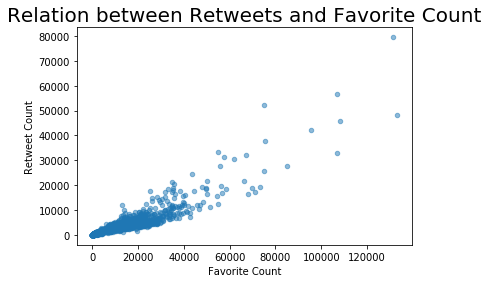

In [77]:
df_master.plot(kind='scatter',x='favorite_count',y='retweet_count', alpha = 0.5)
plt.xlabel('Favorite Count')
plt.ylabel('Retweet Count')
plt.title('Relation between Retweets and Favorite Count', fontsize=20);
plt.savefig('retweets_and_favorite.png', bbox_inches='tight');

          retweet and favorite counts is positively correlated 

In [78]:

stage = df_master[df_master['dog_stage'] != 'None']['dog_stage'].value_counts()
stage

pupper     212
doggo      63 
puppo      23 
floofer    8  
Name: dog_stage, dtype: int64

#### bar graph for Dogs by Stage

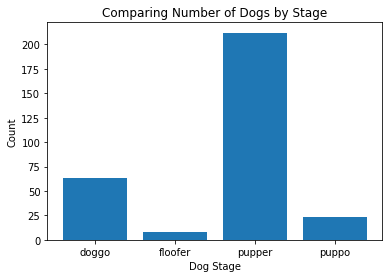

In [79]:
plt.bar(stage.index, stage)
plt.title('Comparing Number of Dogs by Stage')
plt.xlabel('Dog Stage')
plt.ylabel('Count');

        the pupper stage is the most in dog_stage

#### Second insight
        Labrador Retriever is the second most common dog breed 

In [80]:
df_master['p2'].value_counts()


Labrador_retriever                96
golden_retriever                  82
Cardigan                          72
Chihuahua                         43
Chesapeake_Bay_retriever          40
Pomeranian                        39
French_bulldog                    39
toy_poodle                        36
Siberian_husky                    33
miniature_poodle                  32
cocker_spaniel                    32
beagle                            28
Eskimo_dog                        27
collie                            26
Pembroke                          25
kuvasz                            24
Italian_greyhound                 22
Pekinese                          21
malinois                          20
American_Staffordshire_terrier    20
miniature_pinscher                20
chow                              20
Boston_bull                       19
Norwegian_elkhound                19
Samoyed                           19
toy_terrier                       19
Staffordshire_bullterrier         18
p

In [90]:
df_master['p3'].value_counts()

Labrador_retriever                76
Chihuahua                         57
golden_retriever                  46
Eskimo_dog                        36
kelpie                            33
chow                              31
kuvasz                            31
beagle                            30
Staffordshire_bullterrier         30
toy_poodle                        29
cocker_spaniel                    29
Pekinese                          28
Pomeranian                        27
Pembroke                          26
Great_Pyrenees                    26
malamute                          25
French_bulldog                    25
Chesapeake_Bay_retriever          24
American_Staffordshire_terrier    23
Cardigan                          23
pug                               21
basenji                           20
Siberian_husky                    19
bull_mastiff                      19
toy_terrier                       18
Boston_bull                       17
Shetland_sheepdog                 17
b

#### Third insight
        Golden Retriever is the most common dog breed in our data.

In [81]:
df_master['p1'].value_counts()


golden_retriever                  139
Labrador_retriever                95 
Pembroke                          88 
Chihuahua                         79 
pug                               54 
chow                              41 
Samoyed                           40 
toy_poodle                        38 
Pomeranian                        38 
malamute                          29 
cocker_spaniel                    27 
French_bulldog                    26 
Chesapeake_Bay_retriever          23 
miniature_pinscher                22 
seat_belt                         21 
German_shepherd                   20 
Siberian_husky                    20 
Staffordshire_bullterrier         19 
Eskimo_dog                        18 
Shetland_sheepdog                 18 
Maltese_dog                       18 
teddy                             18 
beagle                            17 
Rottweiler                        17 
Shih-Tzu                          17 
Cardigan                          17 
kuvasz      

#### Fourth insight
     What is the dogs breed with the highest confidence?


In [92]:
df_master['p1'][df_master['p1_conf']>=0.9].value_counts()


golden_retriever                  36
Pembroke                          26
pug                               24
Samoyed                           21
Labrador_retriever                17
Pomeranian                        16
Chihuahua                         13
French_bulldog                    12
web_site                          10
chow                              9 
Blenheim_spaniel                  6 
tennis_ball                       6 
toy_poodle                        5 
swing                             4 
Bernese_mountain_dog              4 
vizsla                            4 
Shih-Tzu                          4 
Shetland_sheepdog                 4 
Brittany_spaniel                  4 
American_Staffordshire_terrier    4 
German_shepherd                   4 
Old_English_sheepdog              3 
beagle                            3 
Pekinese                          3 
porcupine                         3 
malamute                          3 
jigsaw_puzzle                     3 
R

        The dog breed with the highest confidence is Golden Retriever.